In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sys
import warnings

In [2]:
if not sys.warnoptions:
  warnings.simplefilter('ignore')

In [9]:
def create_price_estimator():

  # try:
  df = pd.read_csv("/content/Nat_Gas.csv")
  df['Date'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
  df.set_index('Date',inplace=True)
  df.sort_index(inplace=True)

  df_daily_hist = df.resample('D').interpolate(method='linear')

  df_model = df.copy()

  df_model['time_idx'] = np.arange(len(df_model))

  df_model['month'] = df_model.index.month

  X_train = pd.get_dummies(df_model[['time_idx','month']],columns=['month'], drop_first=True,dtype=int)
  y_train = df_model['Prices']

  model = LinearRegression()

  model.fit(X_train,y_train)

  future_month_ends = pd.date_range(start=df.index.max(), periods=13, freq='M')[1:]

  last_time_idx = df_model['time_idx'].max()
  future_time_idx = np.arange(last_time_idx+1, last_time_idx+1+12)
  future_months = future_month_ends.month

  X_future = pd.DataFrame({
      'time_idx': future_time_idx,
      'month': future_months
  })

  X_future_dummies = pd.get_dummies(X_future, columns=['month'], drop_first=True, dtype=int)
  X_future_dummies = X_future_dummies.reindex(columns=X_train.columns, fill_value=0)

  future_prices = model.predict(X_future_dummies)
  df_future_monthly = pd.Series(future_prices, index=future_month_ends,name='Prices')

  last_hist_point = df.iloc[[-1]]

  df_future_base = pd.concat([last_hist_point, df_future_monthly.to_frame()])
  df_daily_future = df_future_base.resample('D').interpolate(method='linear')

  df_daily_future = df_daily_future.iloc[1:]
  df_full_daily = pd.concat([df_daily_hist,df_daily_future])

  plt.figure(figsize=(14,7))
  plt.plot(df.index, df['Prices'], 'ko', label='Original Monthly Data')
  plt.plot(df_daily_hist.index, df_daily_hist['Prices'], 'b-', label='Interpolated History')
  plt.plot(df_daily_future.index, df_daily_future['Prices'], 'r--', label='Extrapolated Future')

  plt.title('Natural Gas Price: History and 1-Year Extrapolation')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.axvline(x=df.index.max(), color='grey', linestyle=':', label='Extrapolation Start')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.savefig('gas_price_full_forecast.png')
  print("File saved forecast")


  price_lookup = df_full_daily['Prices'].copy()

  def get_price_estimate(date_str):
    date = pd.to_datetime(date_str)
    date = date.normalize()

    price = price_lookup.loc[date]
    return f"Estimated price for {date.strftime('%Y-%m-%d')}: {price:.2f}"

  return get_price_estimate

/tmp/ipython-input-3068812929.py:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_daily_hist = df.resample('D').interpolate(method='linear')
/tmp/ipython-input-3068812929.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_month_ends = pd.date_range(start=df.index.max(), periods=13, freq='M')[1:]
/tmp/ipython-input-3068812929.py:44: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_daily_future = df_future_base.resample('D').interpolate(method='linear')


File saved forecast


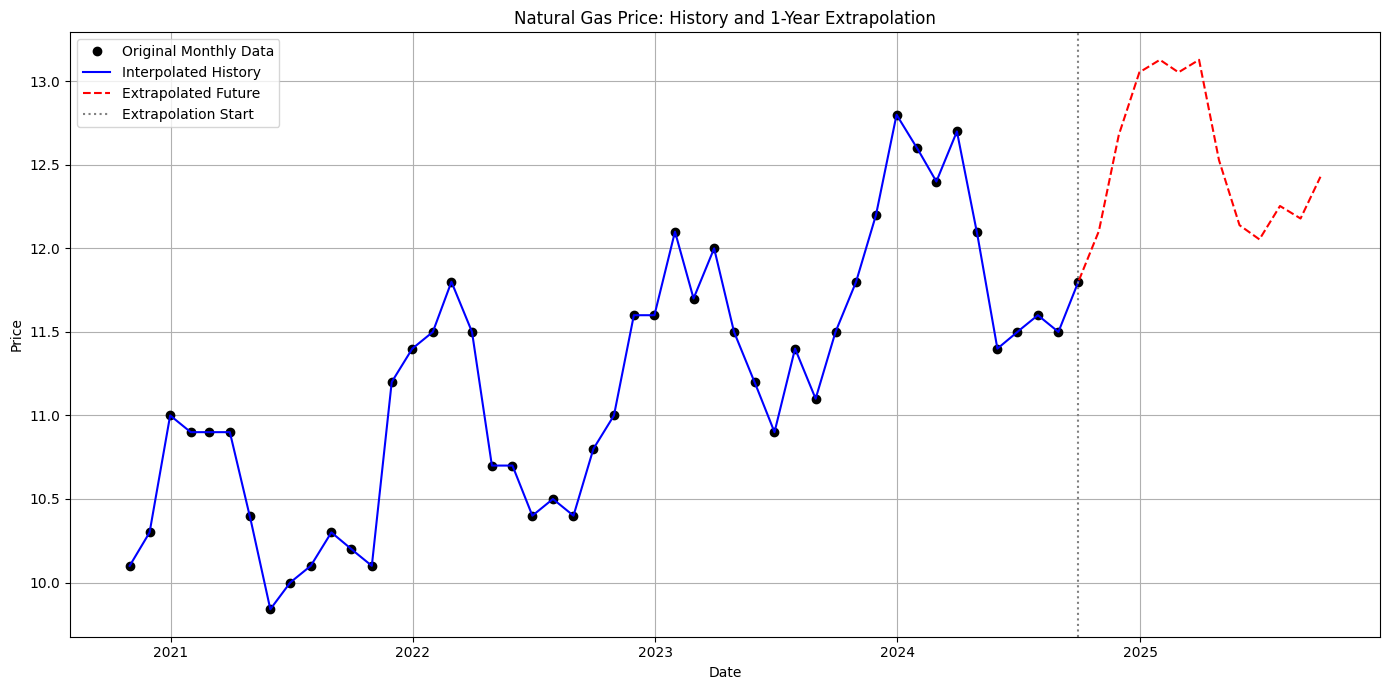

In [10]:
estimator_fun = create_price_estimator()

In [12]:
print("Testing price estimator")

print(estimator_fun("2021-02-15"))

print(estimator_fun("2022-08-14"))

print(estimator_fun("2025-06-26"))

Testing price estimator
Estimated price for 2021-02-15: 10.90
Estimated price for 2022-08-14: 10.45
Estimated price for 2025-06-26: 12.07


Current working directory: /content
os.getcwd() returns an object of type <class 'str'>


/tmp/ipython-input-1403136701.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_time = pd.to_datetime(date_time)
/tmp/ipython-input-1403136701.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/content/Nat_Gas.csv', parse_dates=['Dates'])
/tmp/ipython-input-1403136701.py:29: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax.plot_date(dates, prices, '-')


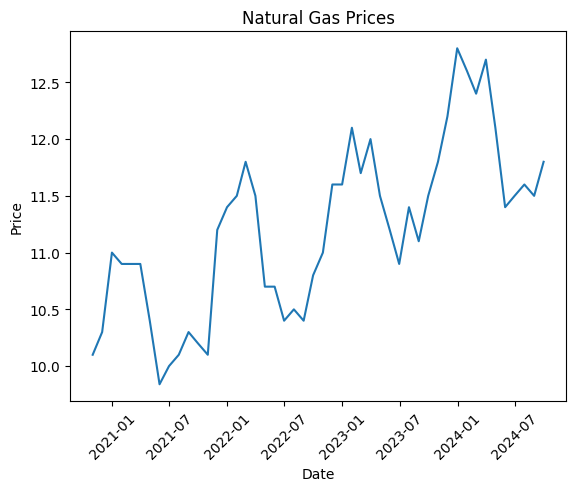

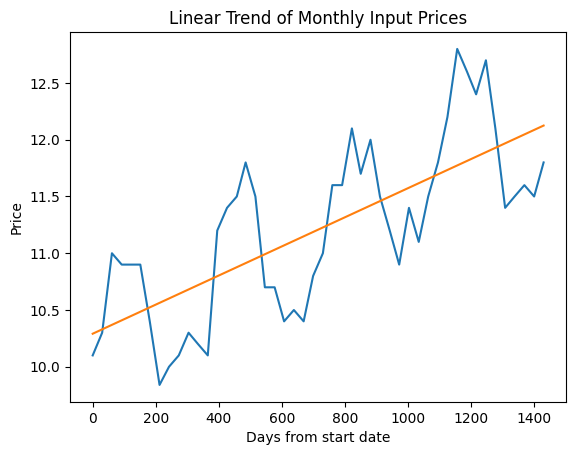

0.001282373598760221 10.29104112595228


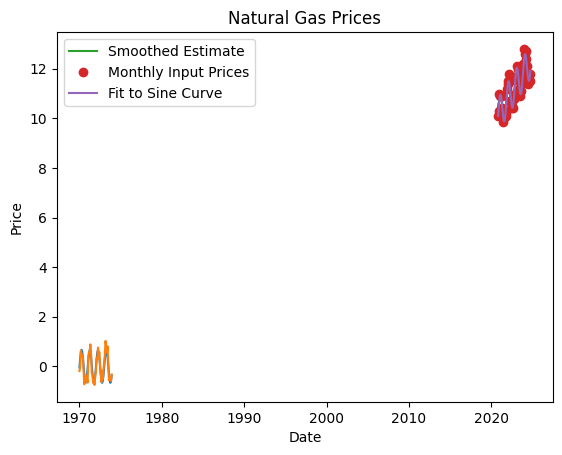

In [14]:
import os

cwd = os.getcwd()

print("Current working directory: {0}".format(cwd))

print ("os.getcwd() returns an object of type {0}".format(type(cwd)))

# copy the filepath
# os.chdir ("________") # This line caused the error

# let's jump into task 1

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date, timedelta

date_time = ["10-2020", "11-2020", "12-2020"]
date_time = pd.to_datetime(date_time)
data = [1, 2, 3]

df = pd.read_csv('/content/Nat_Gas.csv', parse_dates=['Dates'])
prices = df['Prices'].values
dates = df['Dates'].values

# plot prices against dates
fig, ax = plt.subplots()
ax.plot_date(dates, prices, '-')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Natural Gas Prices')
ax.tick_params(axis='x', rotation=45)

plt.show()

# From the plot - we can see the prices have a natural frequency of around a year, but trend upwards.
# We can do a linear regression to get the trend, and then fit a sin function to the variation in each year.

# First we need the dates in terms of days from the start, to make it easier to interpolate later.
start_date = date(2020,10,31)
end_date = date(2024,9,30)
months = []
year = start_date.year
month = start_date.month + 1
while True:
    current = date(year, month, 1) + timedelta(days=-1)
    months.append(current)
    if current.month == end_date.month and current.year == end_date.year:
        break
    else:
        month = ((month + 1) % 12) or 12
        if month == 1:
            year += 1

days_from_start = [(day - start_date ).days for day in months]

# Simple regression for the trend will fit to a model y = Ax + B. The estimator for the slope is given by \hat{A} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2},
# and that for the intercept by \hat{B} = \bar{y} - hat{A} * \xbar

def simple_regression(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    slope = np.sum((x - xbar) * (y - ybar))/ np.sum((x - xbar)**2)
    intercept = ybar - slope*xbar
    return slope, intercept

time = np.array(days_from_start)
slope, intercept = simple_regression(time, prices)

# Plot linear trend
plt.plot(time, prices)
plt.plot(time, time * slope + intercept)
plt.xlabel('Days from start date')
plt.ylabel('Price')
plt.title('Linear Trend of Monthly Input Prices')
plt.show()
print(slope, intercept)

# From this plot we see the linear trend has been captured. Now to fit the intra-year variation.
# Given that natural gas is used more in winter, and less in summer, we can guess the frequency of the price movements to be about a year, or 12 months.
# Therefore we have a model y = Asin( kt + z ) with a known frequency.Rewriting y = Acos(z)sin(kt) + Asin(z)cos(kt),
# we can use bilinear regression, with no intercept, to solve for u = Acos(z), w = Asin(z)

sin_prices = prices - (time * slope + intercept)
sin_time = np.sin(time * 2 * np.pi / (365))
cos_time = np.cos(time * 2 * np.pi / (365))

def bilinear_regression(y, x1, x2):
    # Bilinear regression without an intercept amounts to projection onto the x-vectors
    slope1 = np.sum(y * x1) / np.sum(x1 ** 2)
    slope2 = np.sum(y * x2) / np.sum(x2 ** 2)
    return(slope1, slope2)

slope1, slope2 = bilinear_regression(sin_prices, sin_time, cos_time)

# We now recover the original amplitude and phase shift as A = slope1 ** 2 + slope2 ** 2, z = tan^{-1}(slope2/slope1)
amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
shift = np.arctan2(slope2, slope1)

# Plot smoothed estimate of full dataset
plt.plot(time, amplitude * np.sin(time * 2 * np.pi / 365 + shift))
plt.plot(time, sin_prices)
plt.title('Smoothed Estimate of Monthly Input Prices')

# Define the interpolation/extrapolation function
def interpolate(date):
    days = (date - pd.Timestamp(start_date)).days
    if days in days_from_start:
        # Exact match found in the data
        return prices[days_from_start.index(days)]
    else:
        # Interpolate/extrapolate using the sin/cos model
        return amplitude * np.sin(days * 2 * np.pi / 365 + shift) + days * slope + intercept

# Create a range of continuous dates from start date to end date
continuous_dates = pd.date_range(start=pd.Timestamp(start_date), end=pd.Timestamp(end_date), freq='D')

# Plot the smoothed estimate of the full dataset using interpolation
plt.plot(continuous_dates, [interpolate(date) for date in continuous_dates], label='Smoothed Estimate')

# Fit the monthly input prices to the sine curve
x = np.array(days_from_start)
y = np.array(prices)
fit_amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
fit_shift = np.arctan2(slope2, slope1)
fit_slope, fit_intercept = simple_regression(x, y - fit_amplitude * np.sin(x * 2 * np.pi / 365 + fit_shift))
plt.plot(dates, y, 'o', label='Monthly Input Prices')
plt.plot(continuous_dates, fit_amplitude * np.sin((continuous_dates - pd.Timestamp(start_date)).days * 2 * np.pi / 365 + fit_shift) + (continuous_dates - pd.Timestamp(start_date)).days * fit_slope + fit_intercept, label='Fit to Sine Curve')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Prices')
plt.legend()
plt.show()